# Comparing Book Reviews From Audible and Goodreads

## I am a huge fan of audiobooks, but I find myself not liking the books that I get or not finding ones that I think I will like based on the reviews.  So, like someone who rewatches their favorite tv show over and over again, I will reread the same books constantly.  
## Maybe I'm looking in the wrong place for book recommendations, but Audible's rating includes the rating on the narrator, which is crucial and can make or break a book.
## So, I will go through and pull reviews from both Goodreads and Audible, and compare their ratings to see if there is a difference and get some insights into the differences between two sites.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_audible = pd.read_csv('Audible_Catalog.csv')
# Retrieved from Kaggle: https://www.kaggle.com/datasets/amritvirsinghx/audible-complete-catalog


df_goodreads = pd.read_csv('goodreads_data.csv')
# Retrieved from Kaggle: https://www.kaggle.com/datasets/ishikajohari/best-books-10k-multi-genre-data

## Cleaning Audible Data

In [3]:
df_audible.head()

#renaming to create underscores 
df_audible.rename(columns = {'Number of Reviews' : 'Num_Reviews_Audible', 'Book Name' : 'Book',
                            'Rating' : 'Audible_Rating'}, inplace = True)

df_audible.isnull().sum()

#dropping price column- my intent is to focus on ratings rather than price.
#I will also drop reviews that do not have ratings since my focus is comparing the reviews of books and audiobooks

df_audible.drop('Price', axis = 1, inplace = True)
df_audible.dropna(inplace = True)

In [4]:
df_audible.isnull().sum()

df_audible.info() #Data types are correct

dupes = df_audible[df_audible.duplicated(subset = ['Book'])]
dupes

#dropping duplicates
df_audible.drop_duplicates(subset = 'Book', inplace = True)

df_audible[df_audible.duplicated(subset = ['Book'])].shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5737 entries, 0 to 6366
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Book                 5737 non-null   object 
 1   Author               5737 non-null   object 
 2   Audible_Rating       5737 non-null   float64
 3   Num_Reviews_Audible  5737 non-null   float64
dtypes: float64(2), object(2)
memory usage: 224.1+ KB


(0, 4)

In [5]:
#Changing Num_Reviews_Audible to an integer
df_audible['Num_Reviews_Audible'] = df_audible['Num_Reviews_Audible'].astype(int)

## Cleaning Goodreads Data

In [6]:
df_goodreads.head()

df_goodreads.rename(columns = {'Num_Ratings' : 'Num_Reviews_Goodreads',
                              'Avg_Rating' : 'Goodreads_Rating', 'Genres' : 'Genre'}, inplace = True)

#I'm concerned with ratings, so I will remove description, URL, and Unamed columns

df_goodreads.drop(['Unnamed: 0', 'Description', 'URL'], axis = 1, inplace = True)

df_goodreads.isnull().sum()

df_goodreads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Book                   10000 non-null  object 
 1   Author                 10000 non-null  object 
 2   Genre                  10000 non-null  object 
 3   Goodreads_Rating       10000 non-null  float64
 4   Num_Reviews_Goodreads  10000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 390.8+ KB


In [7]:
#Dropping Duplicates

dupes_goodreads = df_goodreads[df_goodreads.duplicated(subset = ['Book'])]
dupes_goodreads

df_goodreads.drop_duplicates(subset = ['Book'], inplace = True)

In [8]:
df_goodreads[df_goodreads.duplicated(subset = ['Book'])].shape

(0, 5)

In [9]:
#Changing Num_Reviews_Goodreads to an integer
df_goodreads['Num_Reviews_Goodreads'] = df_goodreads['Num_Reviews_Goodreads'].str.replace(',' , '')
df_goodreads['Num_Reviews_Goodreads'] = df_goodreads['Num_Reviews_Goodreads'].astype(int)

In [10]:
#The genre section has a list of genres.  I will limit this to the first one listed to better sort.

df_goodreads = df_goodreads[df_goodreads['Genre'].apply(lambda x: len(x) > 2)]

df_goodreads.head()

,Book,Author,Genre,Goodreads_Rating,Num_Reviews_Goodreads
0,To Kill a Mockingbird,Harper Lee,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,5691311
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135
2,Pride and Prejudice,Jane Austen,"['Classics', 'Fiction', 'Romance', 'Historical...",4.28,3944155
3,The Diary of a Young Girl,Anne Frank,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,3488438
4,Animal Farm,George Orwell,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,3575172


In [11]:
#Updating genre section to the first genre listed: 

df_goodreads['Genre'] = df_goodreads['Genre'].apply(lambda x: x[2:10])

In [12]:
df_goodreads['Genre'] = df_goodreads['Genre'].replace("Fantasy'", "Fantasy")
df_goodreads['Genre'] = df_goodreads['Genre'].replace("Young Ad", "Young Adult")
df_goodreads['Genre'] = df_goodreads['Genre'].replace("Fiction'", "Fiction")        
df_goodreads['Genre'] = df_goodreads['Genre'].replace("Nonficti", "Nonfiction")   
df_goodreads['Genre'] = df_goodreads['Genre'].replace("Poetry',", "Poetry")   
df_goodreads['Genre'] = df_goodreads['Genre'].replace("Romance'", "Science") 
df_goodreads['Genre'] = df_goodreads['Genre'].replace("Science'", "Science") 
df_goodreads['Genre'] = df_goodreads['Genre'].replace("Animals'", "Animals") 
df_goodreads['Genre'] = df_goodreads['Genre'].replace("New Adul", "New Adult") 
df_goodreads['Genre'] = df_goodreads['Genre'].replace("Humor'", "Humor") 
df_goodreads['Genre'] = df_goodreads['Genre'].replace("Psycholo", "Pyschology") 
df_goodreads['Genre'] = df_goodreads['Genre'].replace("Self Hel", "Self Help") 
df_goodreads['Genre'] = df_goodreads['Genre'].replace("Spiritua", "Spiritual") 
df_goodreads['Genre'] = df_goodreads['Genre'].replace("Philosop", "Philosophy") 

### Merging both datasets

In [13]:
df_merged = pd.merge(df_audible, df_goodreads, on = ['Book', 'Author'], how = 'inner')

df_merged.info()

df_merged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 467
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Book                   468 non-null    object 
 1   Author                 468 non-null    object 
 2   Audible_Rating         468 non-null    float64
 3   Num_Reviews_Audible    468 non-null    int32  
 4   Genre                  468 non-null    object 
 5   Goodreads_Rating       468 non-null    float64
 6   Num_Reviews_Goodreads  468 non-null    int32  
dtypes: float64(2), int32(2), object(3)
memory usage: 25.6+ KB


,Book,Author,Audible_Rating,Num_Reviews_Audible,Genre,Goodreads_Rating,Num_Reviews_Goodreads
0,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174,Nonfiction,3.90,950104
1,Influence: The Psychology of Persuasion,Robert B. Cialdini,4.4,3766,Pyschology,4.21,141649
2,How to Win Friends and Influence People,Dale Carnegie,4.5,20872,Self Help,4.22,889455
3,"Thinking, Fast and Slow",Daniel Kahneman,4.4,9774,Nonfiction,4.18,452036
4,Becoming,Michelle Obama,4.6,13848,Nonfiction,4.48,947664


In [14]:
#adjusting column order:

column_order = ['Book', 'Author', 'Audible_Rating', 'Goodreads_Rating', 'Num_Reviews_Audible',
                'Num_Reviews_Goodreads', 'Genre' ]

df_merged = df_merged[column_order]

df_merged.head()

,Book,Author,Audible_Rating,Goodreads_Rating,Num_Reviews_Audible,Num_Reviews_Goodreads,Genre
0,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,3.90,20174,950104,Nonfiction
1,Influence: The Psychology of Persuasion,Robert B. Cialdini,4.4,4.21,3766,141649,Pyschology
2,How to Win Friends and Influence People,Dale Carnegie,4.5,4.22,20872,889455,Self Help
3,"Thinking, Fast and Slow",Daniel Kahneman,4.4,4.18,9774,452036,Nonfiction
4,Becoming,Michelle Obama,4.6,4.48,13848,947664,Nonfiction


### Sorting by the highest number of ratings and highest rating for both Audible and Goodreads

In [15]:
top_sorted_goodreads = df_merged.sort_values(['Num_Reviews_Goodreads', 'Goodreads_Rating'], ascending = [False, False])
top_sorted_goodreads.head()

,Book,Author,Audible_Rating,Goodreads_Rating,Num_Reviews_Audible,Num_Reviews_Goodreads,Genre
10,To Kill a Mockingbird,Harper Lee,4.5,4.27,19930,5691311,Classics
33,The Great Gatsby,F. Scott Fitzgerald,4.2,3.93,10625,4839642,Classics
46,The Fault in Our Stars,John Green,4.5,4.15,43825,4762958,Young Adult
22,1984,George Orwell,4.5,4.19,16938,4201429,Classics
131,Pride and Prejudice,Jane Austen,4.5,4.28,9558,3944155,Classics


In [16]:
top_sorted_audible = df_merged.sort_values(['Num_Reviews_Audible', 'Audible_Rating'], ascending = [False, False])
top_sorted_audible.head()

,Book,Author,Audible_Rating,Goodreads_Rating,Num_Reviews_Audible,Num_Reviews_Goodreads,Genre
21,The Girl on the Train,Paula Hawkins,4.0,3.95,70077,2729895,Fiction
46,The Fault in Our Stars,John Green,4.5,4.15,43825,4762958,Young Adult
76,The Nightingale,Kristin Hannah,4.8,4.60,40839,1113296,Historic
75,The Martian,Andy Weir,4.7,4.41,33258,1038208,Science
12,Think and Grow Rich,Napoleon Hill,4.5,4.18,22330,300966,Business


## Observations:

### 4 out of the 5 top books from Goodreads are classics. 
### 4 out of the 5 top books from Aubible have been major motion pictures (I wonder what percentage of reviews were made before and after the movie came out).

### The top 5 in each category have higher Audible ratings than Goodread ratings, and there are infinitely more Goodread ratings than there are Audible ratings.
###     There are many factors that could contribute to this:
###       1) Audible is a paid subscription service and you cannot leave a review if you are not a member.
###       2) When you sign up for Goodreads, you have to rate at least 20 books in order to receive book recommendations, which can account at leat part of the reason there are so many more reviews on Goodreads than Audible.
###       3) People that left Goodreads ratings could have listened to the audiobook as well.  There is no distinction in that data, as opposed to Audible, where it is safe to assume that people who rated the book also listened to the book.  
###       4) Goodreads has a social aspect to it, where you can link with friends, so it encourages more people to mark books read and to review them.

### Let's look at the ratings side by side:

In [17]:
top_5_genre = ['Fiction', 'Nonfiction', 'Classics', 'Science', 'Philosophy']
df_merged_genre = df_merged[df_merged['Genre'].isin(top_5_genre)]

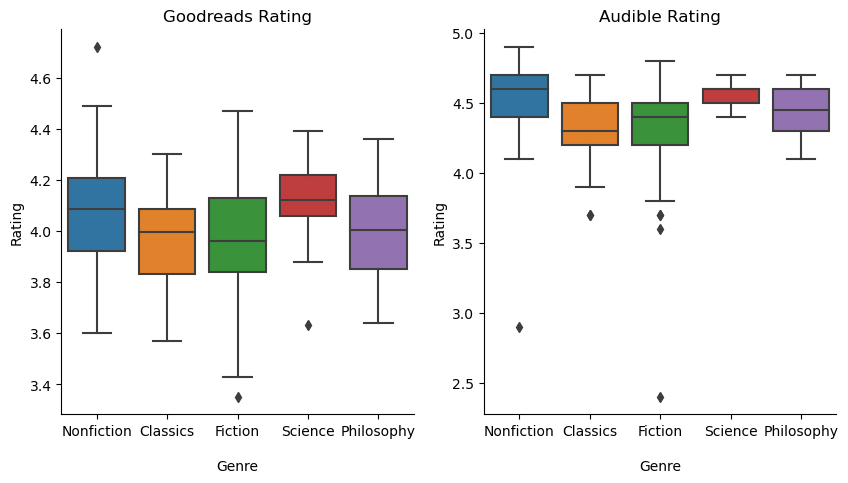

In [18]:
import seaborn as sns 

fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sns.boxplot(data = df_merged_genre, x = 'Genre', y = 'Goodreads_Rating', ax = axs[0])
axs[0].set_title('Goodreads Rating')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].set_ylabel('Rating')
axs[0].set_xlabel('Genre', labelpad = 15)

sns.boxplot(data = df_merged_genre, x = 'Genre', y = 'Audible_Rating', ax = axs[1])
axs[1].set_title('Audible Rating')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].set_ylabel('Rating')
axs[1].set_xlabel('Genre', labelpad = 15)

plt.show()

In [19]:
df_merged.to_excel('Audible_Goodreads_Ratings.xlsx', index = False)

- While I knew that the ratings were higher on Audible, it is interesting to see it visually.  With the higher number of Goodreads reviews, it makes sense that there is also a wider range of ratings.

# Final Thoughts and Business Analytics Recommendations:

- Goodreads makes it really easy to rate a book; you simply clicked a start out of five and move on.  But what if they asked one more simple question, such as, 'How did you read this book?'


- Avid readers know there are large differences between reading a physical book, listening to one on audible, or reading it on a tablet.  I personally use all three; I prefer phyisical books for nonfiction, audible for fiction, and a tablet for quick reads.


- Asking this question will give Amazon, who owns both Audible and Goodreads, an idea of how readers consume books and give them better insights into potential different marketing strategies.


- Another interesting piece of information to have is when readers read the books they review.  As I mentioned above, four out of the five Audible reviews are major motion pictures; were they read before the movie adaptation was announced, or before?  This can give Amazon some idea as to whether a tv show or movie may be successful, depending on when the book was read.


- Lastly, Goodreads offers links to purchase the book from major sellers like Barnes and Noble, Amazon, Audible, and Walmart.  In order to save the potential customer several clicks, Goodreads can link the audio sample of the Audible version of the book right to the Goodreads page.  This may create additional traffic and more subscribers for one of its businesses.